How much money would it cost Queens College to have bikes available for students over a span of one year?

In [2]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
from pint import *
import random
np.random.seed(7)

The purpose of this model is to show how much money Queens College will be spending to maintain and run a bikeshare over a year. Queens College will start off with an inital amount of 250 dollars, where the amount was added up from the cost of each bike and the cost to use a location. There will be 4 locations where each location will contain 3 bikes. The cost of each bike will be 10 dollars and each location will cost 20 dollars. When there is a demand for a bike at a location that no longer has anymore bikes for rent then the program will add 2 more bikes this location and increase Queens College's cost along with increasing its cost, by 50 dollars, due to more spacing needed. In addition, after 10 days Queens College needs to do maintnance of the bikes and it will cost them $30. We are assuming the school uses solar pannels to power the scooters, so the cost to keep them running won't cost anything but the cost for solar pannels is added to the initial amount. Everyday it will cost them 2 dollars per bike for electricity. I will be simulating this by running the simulation for 365 days and allowing 10 rentals to occur each day.

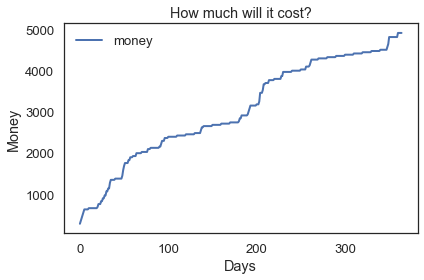

In [3]:
def choose_location(li):
    # We will determine which location by splitting the array in half.
    # If it is heads then go to the first half. Else go to the right
    # If it is heads then we return the left of the two
    if flip():
        temp = li[0:2]
        if flip():
            return temp[0]
        return temp[1]
    else:
        temp = li[2:4]
        if flip():
            return temp[0]
        return temp[1]

    
def simulate():
    # Time Series object to keep track of the growth of money
    money_results = TimeSeries()
    current_money = 250
    total_bikes = 12
    # We created four different locations for Queens College
    location_a = State(loc_id = 1, num_bikes = 3)
    location_b = State(loc_id = 2, num_bikes = 3)
    location_c = State(loc_id = 3, num_bikes = 3)
    location_d = State(loc_id = 4, num_bikes = 3)
    
    # List of customers
    list_of_customers = []
    list_of_locations = [location_a, location_b, location_c, location_d]
    # We created ten different customers
    for i in range(10):
        list_of_customers.append(State(cus_id = i + 1))
    
    # We are creating 365 iterations, where each iteration will represent a day.
    # Where the number of times the money increases is recorded for every ten days
    # and when there is a request for more money
    # 'i' will represent the iterator
    i = 0
    while i < 365:
        # We are at a tenth day so we add $30
        if i % 10 == 0:
            current_money += 30
        j = 0
        # Running the simulation 10 times per day
        while j < 10:
            # We will pick two locations by returning a object from each call
            local_1 = choose_location(list_of_locations)
            local_2 = choose_location(list_of_locations)
            # If the locations are the same then we keep rerunning it until we get different locations
            while local_1 is local_2:
                local_2 = choose_location(list_of_locations)

            # If there are no more bikes at the location then we add 2 more 
            # and increase the cost for Queens College
            if local_1.num_bikes == 0:
                total_bikes += 2
                local_1.num_bikes = 2
                current_money += 2 * 10
                # Increases the cost due to spacing needed for the new bikes
                current_money += 50

            # Location one will be the one that gets a bike removed
            # and location two will be the one that gets one added to it
            local_1.num_bikes -= 1
            local_2.num_bikes += 1
            j += 1
            
        money_results[i] = current_money
        i += 1
    
    plot(money_results, '-', label='money')
    decorate(xlabel='Days', ylabel='Money', title='How much will it cost?')
    

simulate()
    

The graph is displayed as results of the days and the money that gets spent. Starting with an initial cost of 250 dollars, we see an increase by adding more money due to the fact that the school is in need of more bikes. The figure demonstrates how it gradually increases each day. We see time periods where there are no sudden jumps due to the fact that there are no locations that have zero bikes. The model demonstrates how over time the cost continues to increase slower because each location increases the number of bikes that it has. So we see less locations having zero bikes. 